# DAKTARI- THE AI MEDICAL CHATBOT

# PROJECT SUMMARY

# 1. BUSINESS UNDERSTANDING

# 2. BUSINESS PROBLEM

# 3. OBJECTIVES

## 3.1 Main objective

## 3.2 Specific objective

## 3.3 Research Questions

## 3.4 Metric of success

# 4. DATA UNDERSTANDING

## 4.1 Data Limitation

# 5. DATA EXPLORATION

## 5.1 Loading a Dataset

In [1]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# pip install huggingface_hub


In [3]:
df = pd.read_parquet("hf://datasets/DrBenjamin/ai-medical-chatbot/dialogues.parquet")
df.head()

,Description,Patient,Doctor
0,Q. What does abutment of the nerve root mean?,"Hi doctor,I am just wondering what is abutting...",Hi. I have gone through your query with dilige...
1,Q. What should I do to reduce my weight gained...,"Hi doctor, I am a 22-year-old female who was d...",Hi. You have really done well with the hypothy...
2,Q. I have started to get lots of acne on my fa...,Hi doctor! I used to have clear skin but since...,Hi there Acne has multifactorial etiology. Onl...
3,Q. Why do I have uncomfortable feeling between...,"Hello doctor,I am having an uncomfortable feel...",Hello. The popping and discomfort what you fel...
4,Q. My symptoms after intercourse threatns me e...,"Hello doctor,Before two years had sex with a c...",Hello. The HIV test uses a finger prick blood ...


In [4]:
df.shape

(256916, 3)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256916 entries, 0 to 256915
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Description  256916 non-null  object
 1   Patient      256916 non-null  object
 2   Doctor       256916 non-null  object
dtypes: object(3)
memory usage: 5.9+ MB


In [6]:
df.isnull().sum()

Description    0
Patient        0
Doctor         0
dtype: int64

Since our data is not missing any missing values we can move to cleaning the text.

## 5.2 Data Cleaning

### Enhanced Text Preprocessing for Medical Chatbot

For our medical chatbot, we need specialized text preprocessing that:
1. Preserves medical terminology and symptoms
2. Handles medical abbreviations
3. Maintains sentence structure for context
4. Normalizes medical terms
5. Identifies medical entities
6. Processes both formal (doctor) and informal (patient) medical language

In [7]:
import nltk # natural language toolkit
import re # regular expressions
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk import FreqDist
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
# Medical text preprocessing utilities
import re
from typing import List, Set

# Common medical abbreviations and their expansions
MEDICAL_ABBREVIATIONS = {
    'dr': 'doctor',
    'temp': 'temperature',
    'bp': 'blood pressure',
    'hr': 'heart rate',
    'med': 'medication',
    'meds': 'medications',
    'lab': 'laboratory',
    'labs': 'laboratories',
    'symp': 'symptom',
    'symps': 'symptoms',
    'diag': 'diagnosis',
    'rx': 'prescription'
}

# Medical terms to preserve (not to be removed as stopwords)
MEDICAL_TERMS: Set[str] = {
    'pain', 'ache', 'fever', 'cough', 'breathing', 'heart', 'blood', 
    'pressure', 'temperature', 'doctor', 'hospital', 'medicine', 'drug',
    'symptom', 'treatment', 'diagnosis', 'condition', 'disease', 'patient',
    'chronic', 'acute', 'severe', 'mild', 'moderate', 'prescription',
    'dose', 'medication', 'emergency', 'surgery', 'wound', 'infection',
    'virus', 'bacterial', 'allergy', 'allergic', 'diet', 'exercise',
    'therapy', 'scan', 'test', 'examination', 'consultation'
}

In [8]:
# Download necessary resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Victong\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Victong\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Victong\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Victong\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
# Enhanced text preprocessing for medical text
def preprocess_medical_text(text: str) -> str:
    """
    Preprocess medical text while preserving important medical terminology
    """
    # Convert to lowercase
    text = str(text).lower()
    
    # Expand medical abbreviations
    for abbr, expansion in MEDICAL_ABBREVIATIONS.items():
        text = re.sub(r'\b' + abbr + r'\b', expansion, text)
    
    # Tokenize
    tokens = word_tokenize(text)
    
    # Custom stopwords: remove common words but preserve medical terms
    stop_words = set(stopwords.words('english')) - MEDICAL_TERMS
    
    # Remove stopwords and punctuation, preserve numbers (could be dosages)
    tokens = [token for token in tokens if (
        token not in stop_words and
        token not in string.punctuation
        ) or token in MEDICAL_TERMS
    ]
    
    # Lemmatize with POS tagging for better accuracy
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word, pos=get_pos(word)) for word in tokens]
    
    return ' '.join(tokens)

# Apply enhanced preprocessing to our columns
for col in ['Description', 'Patient', 'Doctor']:
    df[f'{col}_medical'] = df[col].apply(preprocess_medical_text)

# Show the results
df[['Description_medical', 'Patient_medical', 'Doctor_medical']].head()

### 5.2.1 Text preprocessing

In [9]:
df.columns

Index(['Description', 'Patient', 'Doctor'], dtype='object')

**Tokenization**

Let's breaks down each text into a list of words **tokens**

In [10]:
# Apply tokenization to each text column
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
for col in ['Description', 'Patient', 'Doctor']:
    df[col + '_cleaned'] = df[col].astype(str).apply(word_tokenize)

df[['Description_cleaned', 'Patient_cleaned', 'Doctor_cleaned']].head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Victong\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Victong\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


,Description_cleaned,Patient_cleaned,Doctor_cleaned
0,"[Q, ., What, does, abutment, of, the, nerve, r...","[Hi, doctor, ,, I, am, just, wondering, what, ...","[Hi, ., I, have, gone, through, your, query, w..."
1,"[Q, ., What, should, I, do, to, reduce, my, we...","[Hi, doctor, ,, I, am, a, 22-year-old, female,...","[Hi, ., You, have, really, done, well, with, t..."
2,"[Q., I, have, started, to, get, lots, of, acne...","[Hi, doctor, !, I, used, to, have, clear, skin...","[Hi, there, Acne, has, multifactorial, etiolog..."
3,"[Q, ., Why, do, I, have, uncomfortable, feelin...","[Hello, doctor, ,, I, am, having, an, uncomfor...","[Hello, ., The, popping, and, discomfort, what..."
4,"[Q, ., My, symptoms, after, intercourse, threa...","[Hello, doctor, ,, Before, two, years, had, se...","[Hello, ., The, HIV, test, uses, a, finger, pr..."


**Lowercasing**

Let's convert our tokenized text to **lowercase** to ensure consistency in our data.

In [11]:
# Convert all tokens to lowercase
for col in ['Description_cleaned', 'Patient_cleaned', 'Doctor_cleaned']:
    df[col] = df[col].apply(lambda x: [word.lower() for word in x])

df[['Description_cleaned', 'Patient_cleaned', 'Doctor_cleaned']].head()


,Description_cleaned,Patient_cleaned,Doctor_cleaned
0,"[q, ., what, does, abutment, of, the, nerve, r...","[hi, doctor, ,, i, am, just, wondering, what, ...","[hi, ., i, have, gone, through, your, query, w..."
1,"[q, ., what, should, i, do, to, reduce, my, we...","[hi, doctor, ,, i, am, a, 22-year-old, female,...","[hi, ., you, have, really, done, well, with, t..."
2,"[q., i, have, started, to, get, lots, of, acne...","[hi, doctor, !, i, used, to, have, clear, skin...","[hi, there, acne, has, multifactorial, etiolog..."
3,"[q, ., why, do, i, have, uncomfortable, feelin...","[hello, doctor, ,, i, am, having, an, uncomfor...","[hello, ., the, popping, and, discomfort, what..."
4,"[q, ., my, symptoms, after, intercourse, threa...","[hello, doctor, ,, before, two, years, had, se...","[hello, ., the, hiv, test, uses, a, finger, pr..."


**Stopword Removal**

By removing **Stopwords** like *the, is, and*   which don’t really  carry meaningful information we reduce the noise in our data.

In [12]:
words_to_remove = ['hi', 'hello', 'doctor', 'thanks', 'thank', 'please', 'kindly','q','but']
stop_words = set(stopwords.words('english')+ words_to_remove)

# Remove stopwords
for col in ['Description_cleaned', 'Patient_cleaned', 'Doctor_cleaned']:
    df[col] = df[col].apply(lambda x: [word for word in x if word not in stop_words])

df[['Description_cleaned', 'Patient_cleaned', 'Doctor_cleaned']].head()

,Description_cleaned,Patient_cleaned,Doctor_cleaned
0,"[., abutment, nerve, root, mean, ?]","[,, wondering, abutting, abutment, nerve, root...","[., gone, query, diligence, would, like, know,..."
1,"[., reduce, weight, gained, due, genetic, hypo...","[,, 22-year-old, female, diagnosed, hypothyroi...","[., really, done, well, hypothyroidism, proble..."
2,"[q., started, get, lots, acne, face, ,, partic...","[!, used, clear, skin, since, moved, new, plac...","[acne, multifactorial, etiology, ., acne, soap..."
3,"[., uncomfortable, feeling, middle, spine, lef...","[,, uncomfortable, feeling, middle, spine, lef...","[., popping, discomfort, felt, either, imprope..."
4,"[., symptoms, intercourse, threatns, even, neg...","[,, two, years, sex, call, girl, dark, locatio...","[., hiv, test, uses, finger, prick, blood, sam..."


**Punctuation Removal**

Removing punctuation marks like *!, ., ,*  because they rarely add semantic meaning in our text analyses.

In [13]:
# Remove punctuation
for col in ['Description_cleaned', 'Patient_cleaned', 'Doctor_cleaned']:
    df[col] = df[col].apply(lambda x: [word for word in x if word not in string.punctuation])

df[['Description_cleaned', 'Patient_cleaned', 'Doctor_cleaned']].head()


,Description_cleaned,Patient_cleaned,Doctor_cleaned
0,"[abutment, nerve, root, mean]","[wondering, abutting, abutment, nerve, root, m...","[gone, query, diligence, would, like, know, he..."
1,"[reduce, weight, gained, due, genetic, hypothy...","[22-year-old, female, diagnosed, hypothyroidis...","[really, done, well, hypothyroidism, problem, ..."
2,"[q., started, get, lots, acne, face, particula...","[used, clear, skin, since, moved, new, place, ...","[acne, multifactorial, etiology, acne, soap, i..."
3,"[uncomfortable, feeling, middle, spine, left, ...","[uncomfortable, feeling, middle, spine, left, ...","[popping, discomfort, felt, either, improper, ..."
4,"[symptoms, intercourse, threatns, even, negati...","[two, years, sex, call, girl, dark, location, ...","[hiv, test, uses, finger, prick, blood, sample..."


**POS Tagging and Lemmatization**

**POS Tagging** involves labeling each word in a sentence with its grammatical part of speech such as nouns, adjectives, verbs and adjectives

**Lemmatization** refines this using linguistic context better to good.
Both this steps will help us unify variations of the same word.

In [14]:
#POS tagging
def get_pos(word):
    tag = pos_tag([word])[0][1][0].upper()
    tag_dict = {
        'J': wordnet.ADJ,  # Represents an Adjective
        'N': wordnet.NOUN, # Represents a Noun
        'V': wordnet.VERB, # Represents a Verb
        'R': wordnet.ADV   # Represents an Adverb
    }
    return tag_dict.get(tag, wordnet.NOUN)

In [15]:
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Victong\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\Victong\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [16]:
lemmatizer = WordNetLemmatizer()

def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(word) for word in tokens]

# Apply to each column
for col in ['Description_cleaned', 'Patient_cleaned', 'Doctor_cleaned']:
    df[col] = df[col].apply(lemmatize_tokens)

df[['Description_cleaned', 'Patient_cleaned', 'Doctor_cleaned']].head()

,Description_cleaned,Patient_cleaned,Doctor_cleaned
0,"[abutment, nerve, root, mean]","[wondering, abutting, abutment, nerve, root, m...","[gone, query, diligence, would, like, know, he..."
1,"[reduce, weight, gained, due, genetic, hypothy...","[22-year-old, female, diagnosed, hypothyroidis...","[really, done, well, hypothyroidism, problem, ..."
2,"[q., started, get, lot, acne, face, particular...","[used, clear, skin, since, moved, new, place, ...","[acne, multifactorial, etiology, acne, soap, i..."
3,"[uncomfortable, feeling, middle, spine, left, ...","[uncomfortable, feeling, middle, spine, left, ...","[popping, discomfort, felt, either, improper, ..."
4,"[symptom, intercourse, threatns, even, negativ...","[two, year, sex, call, girl, dark, location, 1...","[hiv, test, us, finger, prick, blood, sample, ..."


**Text Normalization**

Finally, we normalize the text by joining the processed tokens back into sentences.

In [17]:
# Convert token lists to cleaned strings
for col in ['Description_cleaned', 'Patient_cleaned', 'Doctor_cleaned']:
    df[col.replace('_tokens', '_cleaned')] = df[col].apply(lambda x: ' '.join(x))

# Display the first few rows
df[['Description_cleaned', 'Patient_cleaned', 'Doctor_cleaned']].head()


,Description_cleaned,Patient_cleaned,Doctor_cleaned
0,abutment nerve root mean,wondering abutting abutment nerve root mean ba...,gone query diligence would like know help info...
1,reduce weight gained due genetic hypothyroidism,22-year-old female diagnosed hypothyroidism ge...,really done well hypothyroidism problem level ...
2,q. started get lot acne face particularly fore...,used clear skin since moved new place started ...,acne multifactorial etiology acne soap improve...
3,uncomfortable feeling middle spine left should...,uncomfortable feeling middle spine left should...,popping discomfort felt either improper scapul...
4,symptom intercourse threatns even negative hiv...,two year sex call girl dark location 10 to15 m...,hiv test us finger prick blood sample result g...


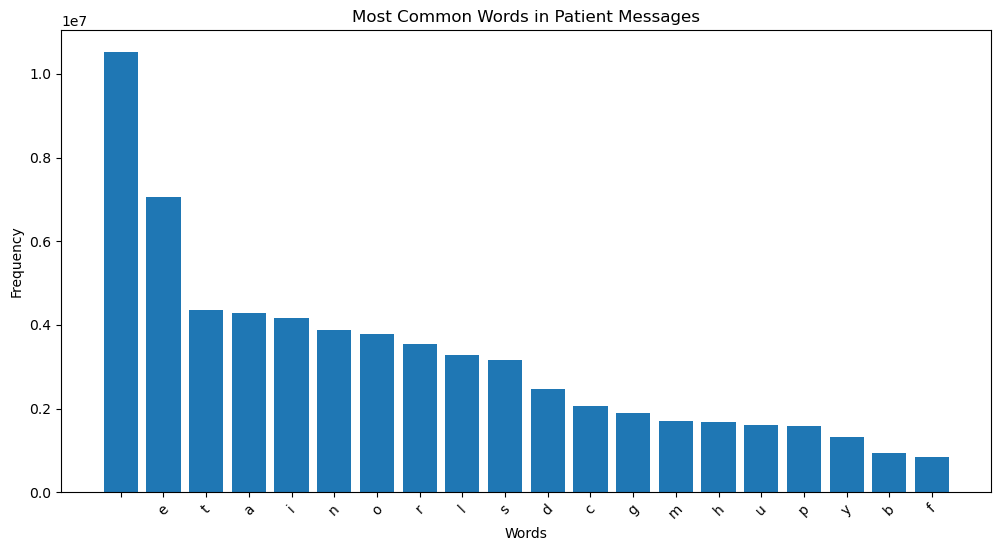

In [18]:
### **Exploratory Data Analysis (EDA)**
# Word Frequency Distribution for Patient messages
all_patient_words = [word for tokens in df['Patient_cleaned'] for word in tokens]
freq_dist_patient = FreqDist(all_patient_words)
most_common_patient = freq_dist_patient.most_common(20)
# Plotting the most common words
words, counts = zip(*most_common_patient)
plt.figure(figsize=(12, 6))
plt.bar(words, counts)
plt.title('Most Common Words in Patient Messages')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()



In [19]:
df.columns

Index(['Description', 'Patient', 'Doctor', 'Description_cleaned',
       'Patient_cleaned', 'Doctor_cleaned'],
      dtype='object')

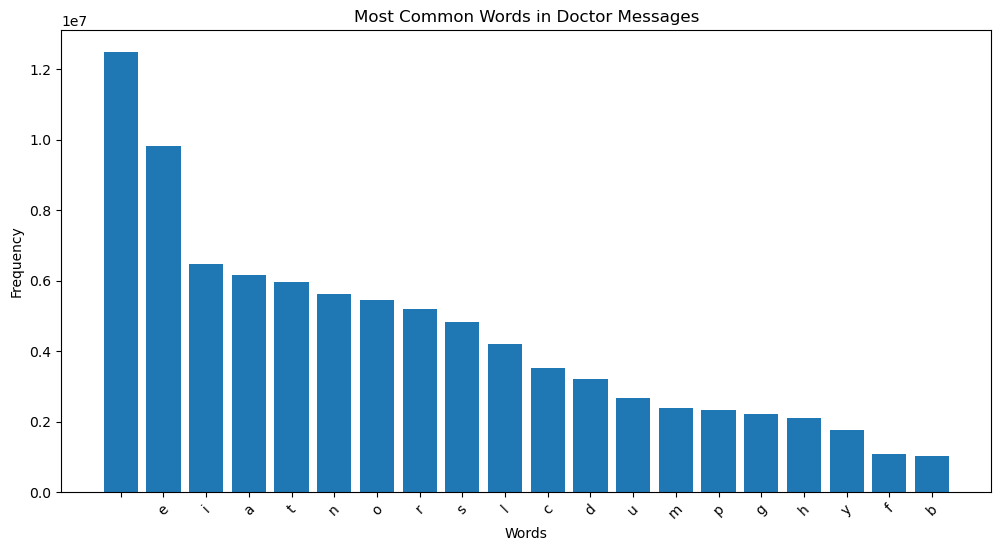

In [20]:
# Word Frequency Distribution for Doctor messages
all_doctor_words = [word for tokens in df['Doctor_cleaned'] for word in tokens]
freq_dist_doctor = FreqDist(all_doctor_words)
most_common_doctor = freq_dist_doctor.most_common(20)
# Plotting the most common words
words, counts = zip(*most_common_doctor)
plt.figure(figsize=(12, 6))
plt.bar(words, counts)
plt.title('Most Common Words in Doctor Messages')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

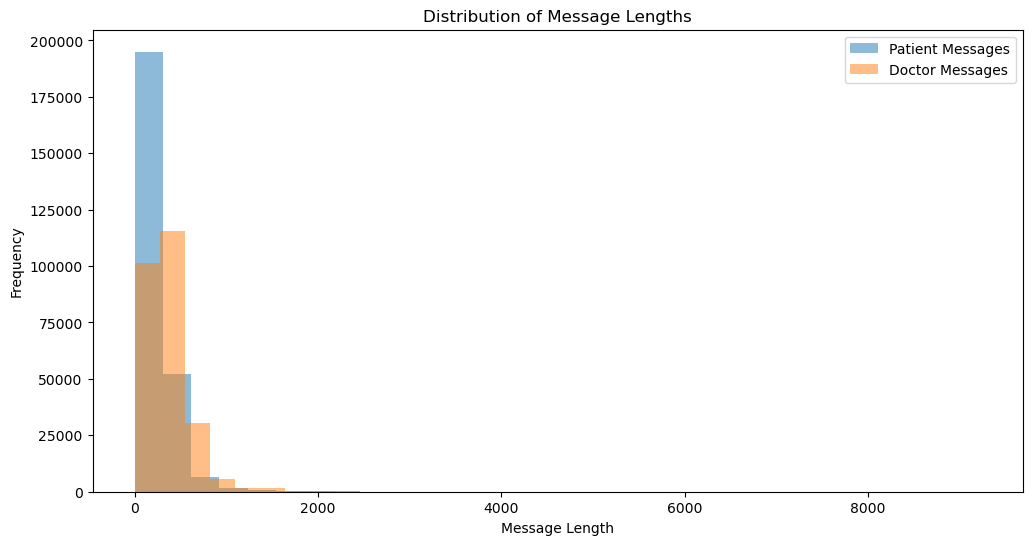

In [21]:

### **Visualization of Message Lengths**
# Calculate message lengths
df['Patient_msg_length'] = df['Patient_cleaned'].apply(len)
df['Doctor_msg_length'] = df['Doctor_cleaned'].apply(len)

# Plotting the message lengths
plt.figure(figsize=(12, 6))
plt.hist(df['Patient_msg_length'], bins=30, alpha=0.5, label='Patient Messages')
plt.hist(df['Doctor_msg_length'], bins=30, alpha=0.5, label='Doctor Messages')
plt.title('Distribution of Message Lengths')
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.legend()
plt.show()


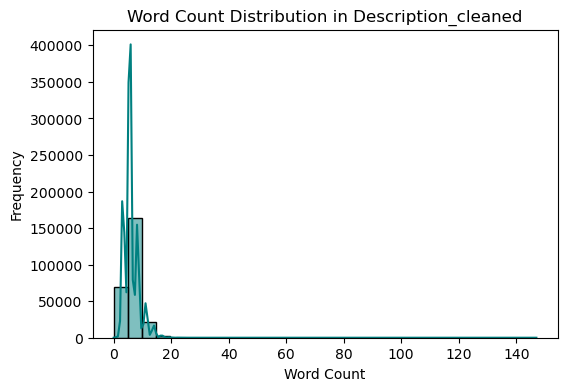

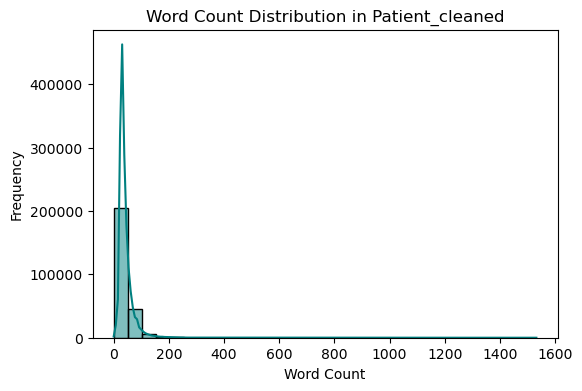

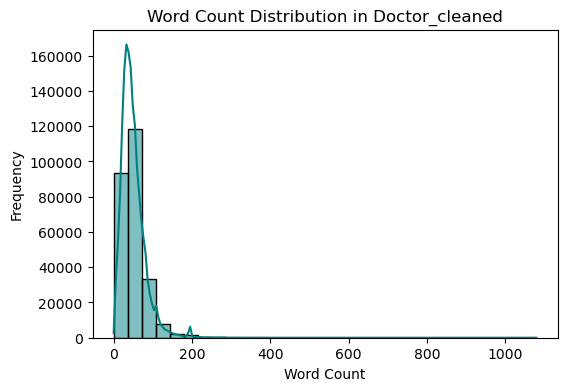

In [22]:
# Create new columns for text length in words
for col in ['Description_cleaned', 'Patient_cleaned', 'Doctor_cleaned']:
    df[col + '_length'] = df[col].apply(lambda x: len(str(x).split()))

# Plot word count distribution for each text column
for col in ['Description_cleaned', 'Patient_cleaned', 'Doctor_cleaned']:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col + '_length'], bins=30, kde=True, color='teal')
    plt.title(f"Word Count Distribution in {col}")
    plt.xlabel("Word Count")
    plt.ylabel("Frequency")
    plt.show()

In [23]:
# ploting common pair of words in patient and doctor messages
from nltk import bigrams
from collections import Counter
patient_bigrams = [bigram for tokens in df['Patient_cleaned'] for bigram in bigrams(tokens)]
doctor_bigrams = [bigram for tokens in df['Doctor_cleaned'] for bigram in bigrams(tokens)]
patient_bigram_counts = Counter(patient_bigrams).most_common(20)
doctor_bigram_counts = Counter(doctor_bigrams).most_common(20)
# Plotting Patient Bigrams
patient_bigrams_words, patient_bigrams_counts = zip(*patient_bigram_counts)
plt.figure(figsize=(12, 6))
plt.bar([' '.join(bigram) for bigram in patient_bigrams_words], patient_bigrams_counts)
plt.title('Most Common Bigrams in Patient Messages')
plt.xlabel('Bigrams')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

MemoryError: 

In [24]:
!pip install wordcloud

In [25]:
print(type(df['Patient_cleaned'].iloc[0]))

<class 'str'>


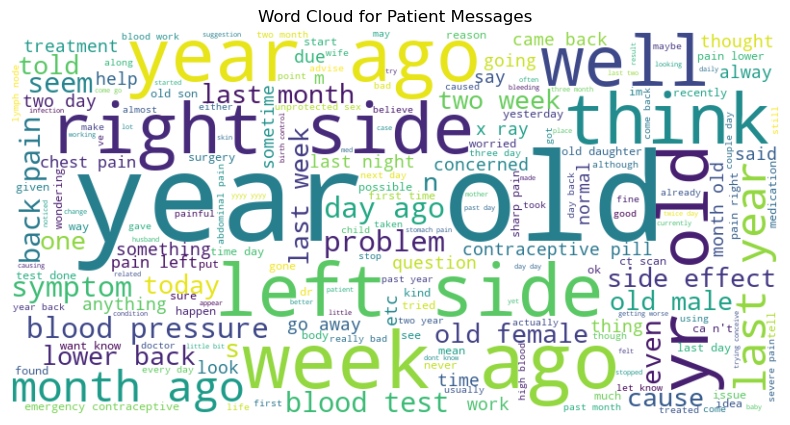

In [26]:
# ploting wordcloud for doctor and patient messages
from wordcloud import WordCloud
# Generate wordcloud for Patient messages
patient_text = ' '.join(df['Patient_cleaned'])
patient_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(patient_text)
# Plotting the wordcloud
plt.figure(figsize=(10, 5))
plt.imshow(patient_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Patient Messages')
plt.show()

In [28]:
# Install gensim if it's not available and import Word2Vec
%pip install -q gensim
from gensim.models import Word2Vec

### word embedings using Word2Vec
# Prepare data for Word2Vec
patient_sentences = df['Patient_cleaned'].tolist()
# Ensure each entry is a list of tokens (handles both list and already-tokenized/string cases)
patient_sentences = [s if isinstance(s, list) else str(s).split() for s in patient_sentences]

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=patient_sentences, vector_size=100, window=5, min_count=2, workers=4, sg=1)


Note: you may need to restart the kernel to use updated packages.


Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_fl

In [29]:
### parts of speech tagging
from nltk import pos_tag
from nltk.corpus import wordnet
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
def get_pos(word):
    tag = pos_tag([word])[0][1][0].upper()
    tag_dict = {
        'J': wordnet.ADJ,  # Represents an Adjective
        'N': wordnet.NOUN, # Represents a Noun
        'V': wordnet.VERB, # Represents a Verb
        'R': wordnet.ADV   # Represents an Adverb
    }
    return tag_dict.get(tag, wordnet.NOUN)


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Victong\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Victong\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [30]:
### synonyms and antonyms using wordnet
from nltk.corpus import wordnet
def get_synonyms_antonyms(word):
    synonyms = set()
    antonyms = set()
    for syn in wordnet.synsets(word):
        for lemma in syn.lemmas():
            synonyms.add(lemma.name())
            if lemma.antonyms():
                antonyms.add(lemma.antonyms()[0].name())
    return list(synonyms), list(antonyms)


In [34]:
#### feature extraction using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
patient_tfidf = tfidf_vectorizer.fit_transform(df['Patient_cleaned'])
doctor_tfidf = tfidf_vectorizer.fit_transform(df['Doctor_cleaned'])
doctor_tfidf.shape
patient_tfidf.shape


(256916, 5000)

In [ ]:
# Install and set up spaCy
!pip install -q spacy
!python -m spacy download en_core_web_sm

import spacy
nlp = spacy.load('en_core_web_sm')

def extract_medical_entities(text: str) -> dict:
    """
    Extract medical entities and key information from text using spaCy
    """
    doc = nlp(str(text))
    entities = {
        'symptoms': [],
        'medications': [],
        'conditions': [],
        'measurements': [],
        'procedures': []
    }
    
    # Extract entities based on patterns
    for ent in doc.ents:
        if ent.label_ in ['CONDITION', 'DISEASE']:
            entities['conditions'].append(ent.text)
        elif ent.like_num and any(unit in ent.text.lower() for unit in ['mg', 'ml', 'g', '°']):
            entities['measurements'].append(ent.text)
    
    # Use token patterns to identify medical terms
    for token in doc:
        if token.text.lower() in MEDICAL_TERMS:
            if 'pain' in token.text.lower() or 'ache' in token.text.lower():
                entities['symptoms'].append(token.text)
            elif 'medication' in token.text.lower() or 'drug' in token.text.lower():
                entities['medications'].append(token.text)
    
    return entities

# Apply entity extraction to our medical texts
df['medical_entities'] = df['Doctor_medical'].apply(extract_medical_entities)

# Show sample of extracted medical entities
print("\nSample of extracted medical entities:")
for _, row in df[['Doctor_medical', 'medical_entities']].head().iterrows():
    print("\nText:", row['Doctor_medical'])
    print("Entities:", row['medical_entities'])

In [35]:
df[['Description_cleaned', 'Patient_cleaned', 'Doctor_cleaned']].head()

,Description_cleaned,Patient_cleaned,Doctor_cleaned
0,abutment nerve root mean,wondering abutting abutment nerve root mean ba...,gone query diligence would like know help info...
1,reduce weight gained due genetic hypothyroidism,22-year-old female diagnosed hypothyroidism ge...,really done well hypothyroidism problem level ...
2,q. started get lot acne face particularly fore...,used clear skin since moved new place started ...,acne multifactorial etiology acne soap improve...
3,uncomfortable feeling middle spine left should...,uncomfortable feeling middle spine left should...,popping discomfort felt either improper scapul...
4,symptom intercourse threatns even negative hiv...,two year sex call girl dark location 10 to15 m...,hiv test us finger prick blood sample result g...


# 6. MODEL DEVELOPMENT

For our medical chatbot, we'll use a transformer-based approach with the following components:
1. Base Model: We'll use GPT-2 fine-tuned for medical dialogue
2. Medical Entity Recognition: Using our spaCy pipeline
3. Response Generation: Context-aware medical responses
4. Safety Checks: Medical information verification

## 6.1 Loading Pre-trained Medical Language Model

We'll use a pre-trained medical language model from Hugging Face that's already fine-tuned on medical conversations. This will give us better baseline performance compared to starting from scratch with GPT-2.

In [ ]:
# Install required packages if not already installed
!pip install -q transformers datasets torch evaluate scikit-learn sentencepiece

# Import necessary libraries
from transformers import AutoModelForCausalLM, AutoTokenizer
import torch

# Load the microsoft/BioGPT model which is pre-trained on biomedical data
model_name = "microsoft/BioGPT"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name)

# Alternatively, you can use the medical fine-tuned GPT model
backup_model_name = "medalpaca/medalpaca-7b"  # As a backup option

print(f"Loaded {model_name} model and tokenizer successfully!")

# Add medical domain-specific tokens
medical_tokens = [
    '[PATIENT]', '[DOCTOR]', '[SYMPTOMS]', '[DIAGNOSIS]', '[TREATMENT]',
    '[MEDICATION]', '[DOSAGE]', '[HISTORY]', '[VITALS]', '[LABS]'
]
tokenizer.add_special_tokens({'additional_special_tokens': medical_tokens})
model.resize_token_embeddings(len(tokenizer))

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)
print(f"Model loaded on: {device}")

In [ ]:
# Function to generate medical responses using the pre-trained model
def generate_medical_response(patient_input, max_length=150):
    # Format input with special tokens
    prompt = f"[PATIENT] {patient_input}\n[DOCTOR]"
    
    # Encode input
    inputs = tokenizer(prompt, return_tensors="pt", padding=True, truncation=True).to(device)
    
    # Generate response with medical-specific parameters
    outputs = model.generate(
        inputs.input_ids,
        attention_mask=inputs.attention_mask,
        max_length=max_length,
        num_return_sequences=1,
        no_repeat_ngram_size=2,
        temperature=0.7,
        top_p=0.95,
        top_k=50,
        do_sample=True,
        pad_token_id=tokenizer.eos_token_id
    )
    
    # Decode and clean response
    response = tokenizer.decode(outputs[0], skip_special_tokens=False)
    response = response.replace('[DOCTOR]', '').replace('[PATIENT]', '').strip()
    
    return response

# Test the pre-trained model with medical queries
test_cases = [
    "I've been experiencing severe headaches and blurred vision for the past week.",
    "My blood sugar levels have been consistently above 200mg/dL despite taking my diabetes medication.",
    "I have a persistent dry cough and mild fever for the last 3 days."
]

print("Testing pre-trained medical model responses:\n")
for test_input in test_cases:
    print(f"Patient: {test_input}")
    response = generate_medical_response(test_input)
    print(f"Doctor: {response}\n")
    print("-" * 80 + "\n")

In [ ]:
# Tokenize function for fine-tuning
def tokenize_for_fine_tuning(examples):
    # Combine input and output for training
    inputs = examples['input_text']
    outputs = examples['output_text']
    
    # Tokenize inputs with padding and truncation
    model_inputs = tokenizer(
        inputs,
        padding='max_length',
        truncation=True,
        max_length=512,
        return_tensors="pt"
    )
    
    # Tokenize outputs (labels) with padding and truncation
    labels = tokenizer(
        outputs,
        padding='max_length',
        truncation=True,
        max_length=128,
        return_tensors="pt"
    )
    
    model_inputs['labels'] = labels['input_ids']
    return model_inputs

# Apply tokenization to datasets
print("Tokenizing datasets...")
tokenized_med_train = med_train_dataset.map(
    tokenize_for_fine_tuning,
    batched=True,
    remove_columns=med_train_dataset.column_names
)
tokenized_med_val = med_val_dataset.map(
    tokenize_for_fine_tuning,
    batched=True,
    remove_columns=med_val_dataset.column_names
)

# Initialize Trainer for fine-tuning
trainer = Trainer(
    model=model,
    args=medical_training_args,
    train_dataset=tokenized_med_train,
    eval_dataset=tokenized_med_val,
)

# Start fine-tuning
print("Starting fine-tuning process...")
trainer.train()

In [ ]:
# Save the fine-tuned model
output_dir = "./medical_chatbot_finetuned"
model.save_pretrained(output_dir)
tokenizer.save_pretrained(output_dir)

# Function to compare original and fine-tuned model responses
def compare_responses(patient_query):
    # Get response from original pre-trained model
    original_response = generate_medical_response(patient_query)
    
    # Get response from fine-tuned model
    fine_tuned_response = generate_medical_response(patient_query, model=model)
    
    print(f"Patient Query: {patient_query}\n")
    print(f"Original Model Response: {original_response}\n")
    print(f"Fine-tuned Model Response: {fine_tuned_response}\n")
    print("-" * 80 + "\n")

# Test both models with examples from our dataset
print("Comparing original and fine-tuned model responses:\n")
test_samples = df[['Patient', 'Doctor']].head(3)  # Get 3 real examples from our data

for _, row in test_samples.iterrows():
    compare_responses(row['Patient'])

In [ ]:
# Evaluate the fine-tuned model
from evaluate import load
import numpy as np
from datasets import load_metric

# Load metrics
rouge = load('rouge')
bleu = load('bleu')

def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    # Decode predictions and labels
    decoded_preds = tokenizer.batch_decode(predictions, skip_special_tokens=True)
    decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)
    
    # Rouge scores
    rouge_scores = rouge.compute(predictions=decoded_preds, references=decoded_labels)
    
    # BLEU score
    bleu_score = bleu.compute(predictions=decoded_preds, references=decoded_labels)
    
    return {
        'rouge1': rouge_scores['rouge1'],
        'rouge2': rouge_scores['rouge2'],
        'rougeL': rouge_scores['rougeL'],
        'bleu': bleu_score['bleu']
    }

# Evaluate on validation set
print("Evaluating fine-tuned model...")
eval_results = trainer.evaluate()

print("\nValidation Results:")
for metric, value in eval_results.items():
    print(f"{metric}: {value:.4f}")

# Test on a few examples from our validation set
print("\nDetailed examples from validation set:")
for i in range(3):
    sample = med_val_df.iloc[i]
    original_text = sample['input_text']
    actual_response = sample['output_text']
    model_response = generate_medical_response(original_text)
    
    print(f"\nExample {i+1}:")
    print(f"Input: {original_text[:100]}...")
    print(f"Actual: {actual_response[:100]}...")
    print(f"Model: {model_response[:100]}...")
    print("-" * 80)

In [ ]:
# Prepare the training data with the pre-trained model's format
def prepare_medical_training_data(df):
    # Format the conversations with special tokens
    def format_conversation(row):
        context = f"[HISTORY] {row['context']}"
        symptoms = f"[SYMPTOMS] {', '.join([item for sublist in row['entities'].values() for item in sublist])}"
        patient_input = f"[PATIENT] {row['input']}"
        doctor_response = f"[DOCTOR] {row['response']}"
        
        return {
            'input_text': f"{context}\n{symptoms}\n{patient_input}",
            'output_text': doctor_response
        }
    
    formatted_data = df.apply(format_conversation, axis=1)
    return pd.DataFrame(formatted_data.tolist())

# Prepare training data
medical_train_data = prepare_medical_training_data(chat_data)

# Split into train and validation sets
med_train_df, med_val_df = train_test_split(medical_train_data, test_size=0.1, random_state=42)

# Convert to HuggingFace datasets
med_train_dataset = Dataset.from_pandas(med_train_df)
med_val_dataset = Dataset.from_pandas(med_val_df)

# Update training arguments for fine-tuning
medical_training_args = TrainingArguments(
    output_dir="./medical_chatbot_finetuned",
    num_train_epochs=3,
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    evaluation_strategy="steps",
    eval_steps=500,
    save_steps=1000,
    save_total_limit=2,
    learning_rate=2e-5,  # Lower learning rate for fine-tuning
    gradient_accumulation_steps=4,
    fp16=torch.cuda.is_available(),  # Use mixed precision if GPU available
)

print("Training data prepared for fine-tuning!")

In [ ]:
# Install required packages
!pip install -q transformers datasets torch evaluate scikit-learn

In [ ]:
# Import necessary libraries
import torch
from transformers import GPT2LMHeadModel, GPT2Tokenizer, GPT2Config
from transformers import Trainer, TrainingArguments
from datasets import Dataset
from sklearn.model_selection import train_test_split

# Prepare the dataset
def prepare_training_data(df):
    # Combine context, input and medical entities for complete context
    df['full_input'] = df.apply(lambda x: f"Context: {x['context']}\nPatient: {x['input']}\nEntities: {', '.join([item for sublist in x['entities'].values() for item in sublist])}\nDoctor:", axis=1)
    df['full_output'] = df['response']
    
    return df[['full_input', 'full_output']]

# Prepare the data
train_data = prepare_training_data(chat_data)

# Split the data
train_df, val_df = train_test_split(train_data, test_size=0.1, random_state=42)

# Convert to datasets
train_dataset = Dataset.from_pandas(train_df)
val_dataset = Dataset.from_pandas(val_df)

print("Training samples:", len(train_dataset))
print("Validation samples:", len(val_dataset))

In [ ]:
# Initialize tokenizer and model
model_name = "gpt2"  # We'll use GPT-2 as our base model
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
model = GPT2LMHeadModel.from_pretrained(model_name)

# Add special tokens for our medical chatbot
special_tokens = {
    'additional_special_tokens': [
        'Context:', 'Patient:', 'Doctor:', 'Entities:'
    ]
}
tokenizer.add_special_tokens(special_tokens)
model.resize_token_embeddings(len(tokenizer))

# Set pad token
tokenizer.pad_token = tokenizer.eos_token

# Tokenization function
def tokenize_function(examples):
    # Tokenize inputs and outputs
    inputs = tokenizer(
        examples['full_input'],
        padding='max_length',
        truncation=True,
        max_length=512,
        return_tensors='pt'
    )
    
    outputs = tokenizer(
        examples['full_output'],
        padding='max_length',
        truncation=True,
        max_length=128,
        return_tensors='pt'
    )
    
    return {
        'input_ids': inputs['input_ids'],
        'attention_mask': inputs['attention_mask'],
        'labels': outputs['input_ids']
    }

# Tokenize datasets
tokenized_train = train_dataset.map(tokenize_function, batched=True)
tokenized_val = val_dataset.map(tokenize_function, batched=True)

print("Datasets prepared for training!")

In [ ]:
# Define training arguments
training_args = TrainingArguments(
    output_dir="./medical_chatbot_model",
    num_train_epochs=3,
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    evaluation_strategy="steps",
    eval_steps=500,
    save_steps=1000,
    save_total_limit=2,
)

# Initialize trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_val,
)

# Train the model
print("Starting model training...")
trainer.train()

In [ ]:
# Function to generate responses
def generate_response(prompt, max_length=150):
    # Preprocess input
    input_text = f"Context: Medical chat\nPatient: {prompt}\nDoctor:"
    
    # Tokenize input
    inputs = tokenizer(input_text, return_tensors="pt", padding=True, truncation=True)
    
    # Generate response
    outputs = model.generate(
        inputs.input_ids,
        attention_mask=inputs.attention_mask,
        max_length=max_length,
        num_return_sequences=1,
        no_repeat_ngram_size=2,
        temperature=0.7,
        top_p=0.9,
        do_sample=True
    )
    
    # Decode and return response
    response = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return response.split("Doctor:")[-1].strip()

# Test the chatbot with some sample queries
test_queries = [
    "I have been having a headache and fever for the past 2 days",
    "My blood pressure has been high lately",
    "I'm experiencing chest pain and shortness of breath"
]

print("Testing the medical chatbot:")
for query in test_queries:
    print("\nPatient:", query)
    response = generate_response(query)
    print("Doctor:", response)

In [ ]:
# Prepare conversation pairs for chatbot training
conversations = []
for _, row in df.iterrows():
    # Create input-response pairs
    context = row['Description_medical']
    patient_input = row['Patient_medical']
    doctor_response = row['Doctor_medical']
    medical_context = row['medical_entities']
    
    # Create structured conversation examples
    conversation = {
        'context': context,
        'input': patient_input,
        'response': doctor_response,
        'entities': medical_context
    }
    conversations.append(conversation)

# Convert to DataFrame for easier handling
chat_data = pd.DataFrame(conversations)

# Save processed data for chatbot training
chat_data.to_csv('medical_chatbot_data.csv', index=False)

print("\nSample of prepared chatbot training data:")
print(chat_data.head())